<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#6-8.-프로젝트-:-모든-장르-간-편향성-측정해-보기" data-toc-modified-id="6-8.-프로젝트-:-모든-장르-간-편향성-측정해-보기-1">6-8. 프로젝트 : 모든 장르 간 편향성 측정해 보기</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#STEP-1.-형태소-분석기를-이용하여-품사가-명사인-경우-해당-단어를-추출하기" data-toc-modified-id="STEP-1.-형태소-분석기를-이용하여-품사가-명사인-경우-해당-단어를-추출하기-1.0.1">STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기</a></span></li><li><span><a href="#STEP-2.-추출된-결과로-embedding-model-만들기" data-toc-modified-id="STEP-2.-추출된-결과로-embedding-model-만들기-1.0.2">STEP 2. 추출된 결과로 embedding model 만들기</a></span></li><li><span><a href="#STEP-3.-target,-attribute-단어-셋-만들기" data-toc-modified-id="STEP-3.-target,-attribute-단어-셋-만들기-1.0.3">STEP 3. target, attribute 단어 셋 만들기</a></span></li><li><span><a href="#STEP-4.-WEAT-score-계산과-시각화" data-toc-modified-id="STEP-4.-WEAT-score-계산과-시각화-1.0.4">STEP 4. WEAT score 계산과 시각화</a></span></li><li><span><a href="#루브릭" data-toc-modified-id="루브릭-1.0.5">루브릭</a></span></li><li><span><a href="#Postscript" data-toc-modified-id="Postscript-1.0.6">Postscript</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-1.0.7">Reference</a></span></li></ul></li></ul></li></ul></div>

# 6-8. 프로젝트 : 모든 장르 간 편향성 측정해 보기

지금까지 우리는 영화 시놉시스 코퍼스를 가지고 영화 구분과 영화 장르 간에 내재된 편향성을 측정하는 작업을 진행해 보았습니다. 어느 정도는 우리의 상식과 일치하는 편향성이 측정되었을 것입니다.

이번에는 모든 장르에 대해 영화 구분과의 편향성 정도를 측정해 보겠습니다. 대부분의 과정은 이전 스텝에서 이미 진행한 내용을 참고해서 동일하게 진행 가능할 것입니다.

### STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기
---

In [1]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt',
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt',
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt',
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt',
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
              '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [2]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt


def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line:
                break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]:  # , "Adjective", "Verb"]:
                    result.append((word[0]))
    return ' '.join(result)

In [3]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [5]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[24574])

24574
영화


### STEP 2. 추출된 결과로 embedding model 만들기
---

In [6]:
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line:
            break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:  # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])  # 명사일 때만 tokenized 에 저장하게 됩니다.
        tokenized.append(res)

In [8]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다.
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)
# model.most_similar(positive=['영화'])

[('작품', 0.8881744742393494),
 ('다큐멘터리', 0.8574523329734802),
 ('영화로', 0.8076199889183044),
 ('주제', 0.8041880130767822),
 ('드라마', 0.802151620388031),
 ('코미디', 0.7966838479042053),
 ('소재', 0.7925329208374023),
 ('버자이너', 0.7848096489906311),
 ('스토리', 0.7813448309898376),
 ('형식', 0.7762503623962402)]

In [26]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.7226555347442627),
 ('첫사랑', 0.7103566527366638),
 ('아르튬', 0.705500066280365),
 ('만인', 0.6882439851760864),
 ('이별', 0.6817427277565002),
 ('정해준', 0.6790524125099182),
 ('만남', 0.6748457551002502),
 ('가슴', 0.6724749803543091),
 ('연애', 0.6719480156898499),
 ('우정', 0.6710518598556519)]

In [27]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.9030353426933289),
 ('영화감독', 0.9012834429740906),
 ('영감', 0.8889893293380737),
 ('캐스팅', 0.8872846961021423),
 ('데뷔', 0.8865000009536743),
 ('각색', 0.8785967826843262),
 ('예술가', 0.8693811297416687),
 ('출연', 0.8668587803840637),
 ('뮤지컬', 0.8654989004135132),
 ('배우', 0.8632176518440247)]

### STEP 3. target, attribute 단어 셋 만들기
---
이전 스텝에서는 TF-IDF를 사용해서 단어 셋을 만들었습니다. 이 방법으로도 어느 정도는 대표 단어를 잘 선정할 수 있습니다. 그러나 TF-IDF가 높은 단어를 골랐음에도 불구하고 중복되는 단어가 발생하는 문제가 있었습니다.  
개념축을 표현하는 단어가 제대로 선정되지 않은 것은 WEAT 계산 결과에 악영향을 미칩니다.

혹시 TF-IDF를 적용했을 때의 문제점이 무엇인지 지적 가능하다면 그 문제점을 지적하고 스스로 방법을 개선하여 대표 단어 셋을 구축해 보기 바랍니다. TF-IDF 방식을 쓰더라도 중복된 단어를 잘 제거하면 여전히 유용한 방식이 될 수 있습니다.

In [13]:
# 비슷한 작업을 번잡스럽게 해야해서 기존에 진행한 결과를 그대로 가져왔다.

target_art = ['아빠', '음악', '결심', '운명', '지금', '여인', '이름',
              '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
target_gen = ['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출',
              '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']

In [9]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

### STEP 4. WEAT score 계산과 시각화
---
영화 구분, 영화 장르에 따른 편향성을 측정하여 WEAT score로 계산해 보고 이를 Heatmap 형태로 시각화해 봅시다. 편향성이 두드러지는 영화장르 attribute 구성에는 어떤 케이스가 있는지 시각적으로 두드러지게 구성되면 좋습니다.

In [12]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [22]:
from numpy import dot
from numpy.linalg import norm


def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))


def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B  # , c_a, c_b


def weat_score(X, Y, A, B):

    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)

    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))

    return (mean_X-mean_Y)/std_dev

In [23]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

<AxesSubplot:>

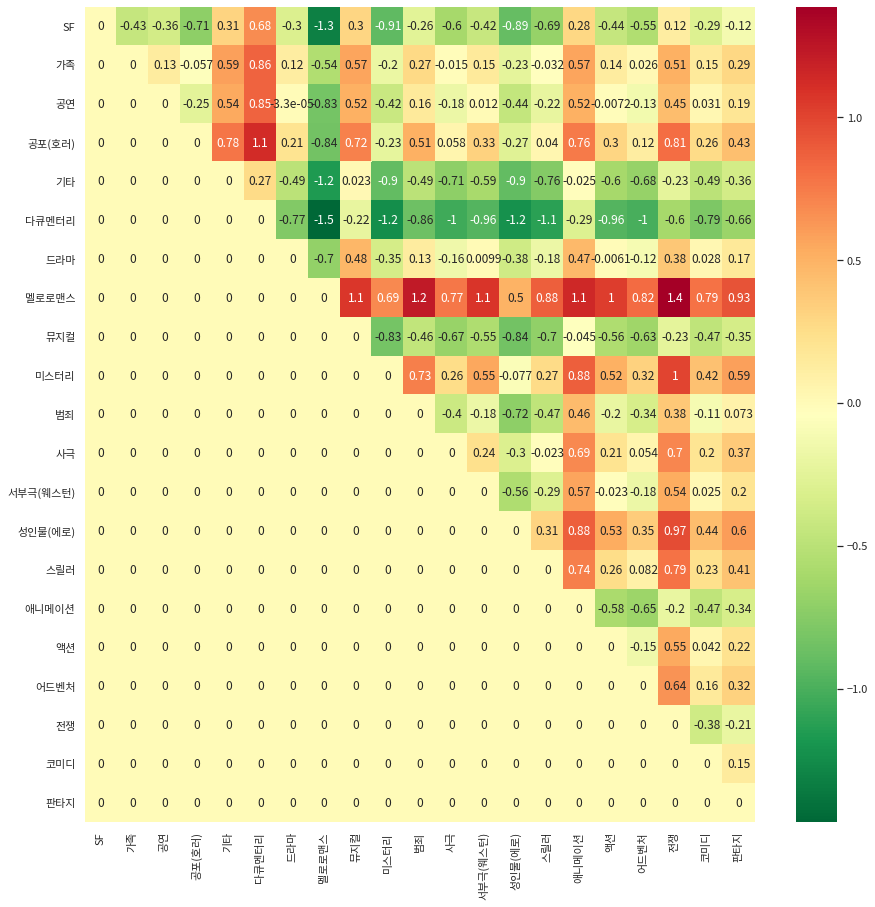

In [25]:
import matplotlib.pylab as plt
import seaborn as sns

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")

plt.rcParams['figure.figsize'] = (15, 15)
ax = sns.heatmap(matrix, xticklabels=genre_name,
                 yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

### 루브릭
---
아래의 기준을 바탕으로 프로젝트를 평가합니다.

|평가문항|상세기준|
|:---|:---|
|1. 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델을 정상적으로 만들었다.|워드임베딩의 most_similar() 메소드 결과가 의미상 바르게 나왔다.|
|2. 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단어 셋을 생성하였다.|타당한 방법론을 통해 중복이 잘 제거되고 개념축을 의미적으로 잘 대표하는 단어 셋이 만들어졌다.|
|3. WEAT score 계산 및 시각화를 정상적으로 진행하였다.|전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화하였다.|

### Postscript
---
- WEAT score를 직관적으로 이해하는 문제를 제외하면 크게 어려움이 없었다.

### Reference
---